In [1]:
import glob

import datetime

from IPython.display import display

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
train_dirs = glob.glob('../train/*.csv')
valid_dir = '../validation/validation.csv'

In [3]:
train_datas = [pd.read_csv(path) for path in train_dirs]

In [4]:
integrated = pd.DataFrame(columns=train_datas[0].columns)
for data in train_datas:
    integrated = integrated.append(data)
integrated

,timestamp,C01,C02,C03,C04,C05,C06,C07,C08,C09,...,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86
0,2021-07-11 10:00:00,-2.2642,0,12.26196,-0.00087,12.01019,0.2254,12.66931,70,1,...,0.92255,30.08042,7.08818,595.06104,276.40338,1,1014.79321,12.0,50,3506
1,2021-07-11 10:00:01,-2.4923,0,12.26196,0.00058,12.56714,-0.0711,12.66931,70,1,...,0.92255,30.08423,7.08818,531.50317,276.18634,1,1014.79321,12.0,50,3493
2,2021-07-11 10:00:02,-2.8460,0,12.26196,-0.00072,14.48975,0.0051,12.66931,70,1,...,0.91873,30.09148,7.08818,451.06253,279.85754,1,1014.79321,12.0,50,3490
3,2021-07-11 10:00:03,-2.1235,0,12.26196,0.00101,15.93170,0.1842,12.66931,70,1,...,0.91644,30.10407,7.08818,404.38739,281.50317,1,1014.79321,12.0,50,3525
4,2021-07-11 10:00:04,-2.9074,0,12.26196,0.00043,16.10718,0.1842,12.66931,70,1,...,0.91797,30.10331,7.08818,382.53925,281.34039,1,1014.79321,12.0,50,3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259195,2021-08-09 08:59:56,-2.0065,0,12.26196,0.00051,100.28228,0.5977,12.53358,70,1,...,1.17355,35.05434,10.00000,3178.48877,370.02679,1,986.05908,12.0,50,136
259196,2021-08-09 08:59:57,-2.2101,0,12.26196,-0.00029,100.28228,0.5509,12.53358,70,1,...,1.16898,35.03488,10.00000,3175.36084,370.40656,1,986.05908,12.0,50,89
259197,2021-08-09 08:59:58,-2.3325,0,12.26196,0.00152,100.28228,0.5425,12.53358,70,1,...,1.16974,35.02840,10.00000,3175.73608,368.12787,1,986.05908,12.0,50,90
259198,2021-08-09 08:59:59,-2.3049,0,12.26196,0.00058,100.26703,0.6266,12.53358,70,1,...,1.16974,35.02420,10.00000,3176.61182,368.01941,1,986.05908,12.0,50,74


In [9]:
isna = integrated.isna().any()
temp = []
for col in integrated.columns:
    if isna[col]:
        temp.append(col)
print(temp)

[]


In [6]:
selected_columns = set(integrated.columns.drop('timestamp'))
columns_to_remove = []
mins, maxes = integrated.min(), integrated.max()
for col in integrated.columns:
    if mins[col] == maxes[col]:
        selected_columns.remove(col)
selected_columns = sorted(list(selected_columns))
print(selected_columns)

['C01', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C20', 'C21', 'C23', 'C24', 'C25', 'C27', 'C28', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C37', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C50', 'C51', 'C53', 'C54', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C64', 'C65', 'C66', 'C67', 'C68', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C83', 'C84', 'C86']


In [10]:
train = integrated[selected_columns]
train

,C01,C03,C04,C05,C06,C07,C08,C11,C12,C13,...,C75,C76,C77,C78,C79,C80,C81,C83,C84,C86
0,-2.2642,12.26196,-0.00087,12.01019,0.2254,12.66931,70,11704,17.61017,28.03686,...,26.13983,48.90190,0.92255,30.08042,7.08818,595.06104,276.40338,1014.79321,12.0,3506
1,-2.4923,12.26196,0.00058,12.56714,-0.0711,12.66931,70,11847,17.61780,28.03169,...,26.13983,48.94870,0.92255,30.08423,7.08818,531.50317,276.18634,1014.79321,12.0,3493
2,-2.8460,12.26196,-0.00072,14.48975,0.0051,12.66931,70,11953,17.61780,28.03504,...,26.14746,48.89090,0.91873,30.09148,7.08818,451.06253,279.85754,1014.79321,12.0,3490
3,-2.1235,12.26196,0.00101,15.93170,0.1842,12.66931,70,12051,17.61780,28.03510,...,26.13983,48.95938,0.91644,30.10407,7.08818,404.38739,281.50317,1014.79321,12.0,3525
4,-2.9074,12.26196,0.00043,16.10718,0.1842,12.66931,70,12180,17.61780,28.03510,...,26.13983,49.02211,0.91797,30.10331,7.08818,382.53925,281.34039,1014.79321,12.0,3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259195,-2.0065,12.26196,0.00051,100.28228,0.5977,12.53358,70,8536,13.45978,28.03433,...,38.49182,48.07038,1.17355,35.05434,10.00000,3178.48877,370.02679,986.05908,12.0,136
259196,-2.2101,12.26196,-0.00029,100.28228,0.5509,12.53358,70,8519,13.45978,28.03521,...,38.49182,48.04736,1.16898,35.03488,10.00000,3175.36084,370.40656,986.05908,12.0,89
259197,-2.3325,12.26196,0.00152,100.28228,0.5425,12.53358,70,8508,13.45978,28.03348,...,38.49182,48.00608,1.16974,35.02840,10.00000,3175.73608,368.12787,986.05908,12.0,90
259198,-2.3049,12.26196,0.00058,100.26703,0.6266,12.53358,70,8511,13.45978,28.03605,...,38.49182,47.90826,1.16974,35.02420,10.00000,3176.61182,368.01941,986.05908,12.0,74


In [11]:
Scaler = StandardScaler()
train_np = Scaler.fit_transform(train)
train_np

array([[-0.19592621,  0.13095205, -0.51044662, ...,  0.12097539,
        -0.00560655,  1.40517852],
       [-0.42462593,  0.13095205,  0.37144273, ...,  0.12097539,
        -0.00560655,  1.3975026 ],
       [-0.77925589,  0.13095205, -0.41921669, ...,  0.12097539,
        -0.00560655,  1.39573124],
       ...,
       [-0.26440578,  0.13095205,  0.94315031, ..., -0.60070598,
        -0.00560655, -0.61181637],
       [-0.23673322,  0.13095205,  0.37144273, ..., -0.60070598,
        -0.00560655, -0.62126365],
       [-0.13266031,  0.13095205, -0.06646095, ..., -0.60070598,
        -0.00560655, -0.60532136]])

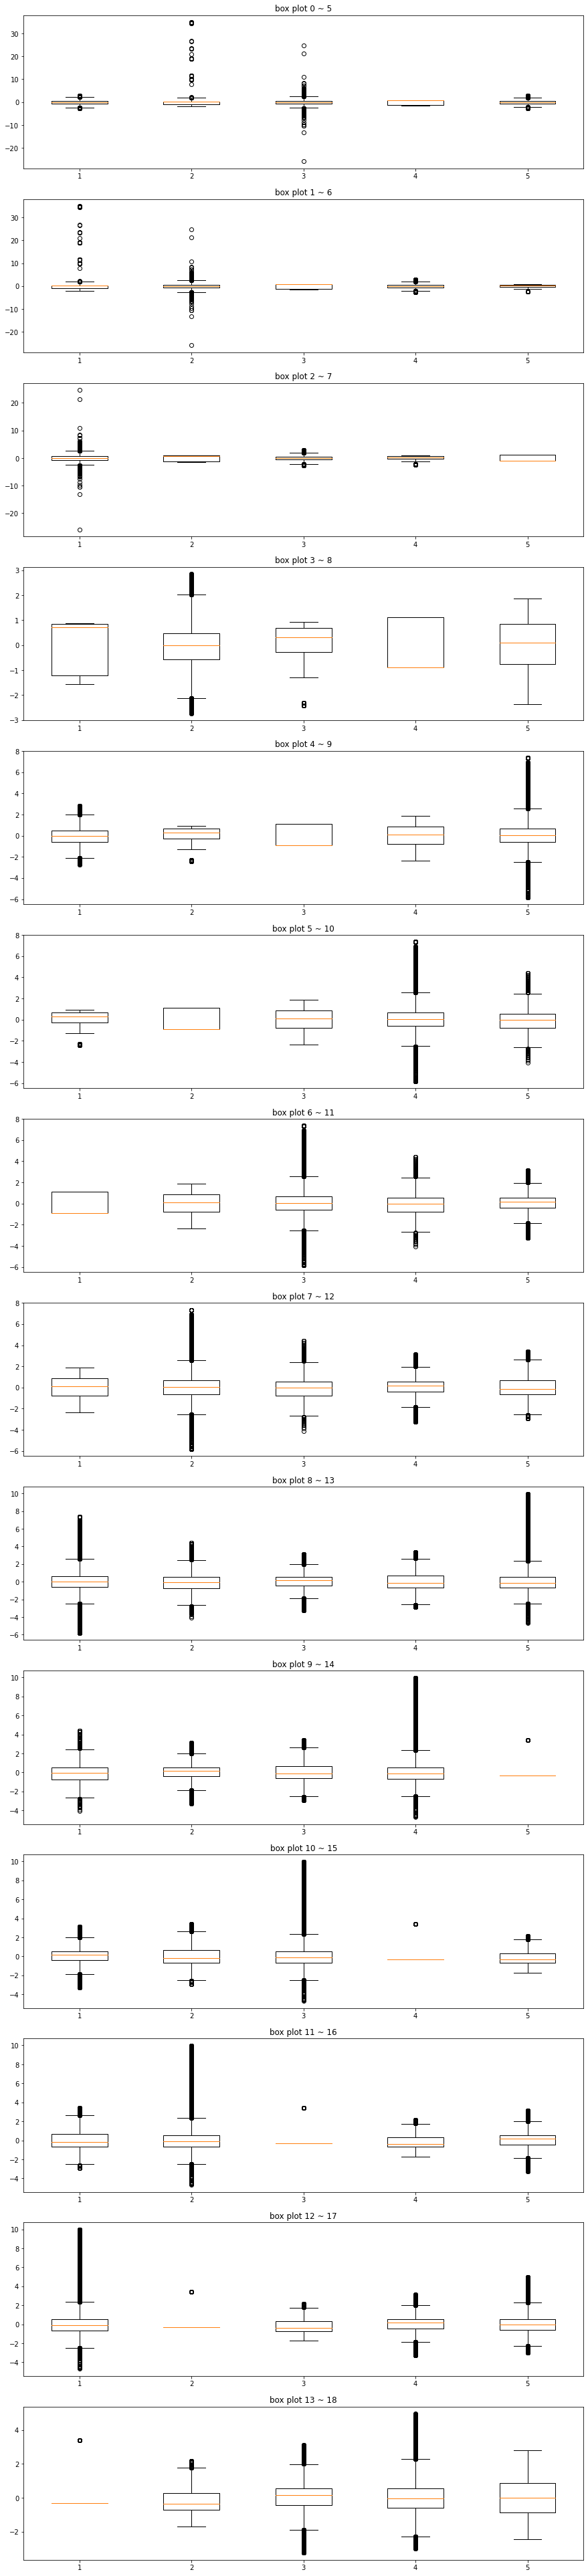

In [12]:
def boxplot(train_np, one_line=5):
    L = train_np.shape[1]
    lines = L // one_line + 1 if L % one_line else L // one_line
    fig, ax = plt.subplots(lines, 1, figsize=(15, 5*lines))
    for i in range(lines):
        end = min(i + one_line, L)
        ax[i].set(title=f'box plot {i} ~ {end}')
        ax[i].boxplot(train_np[:, i:end])
    plt.show()
boxplot(train_np)

In [14]:
def time2datetime(str_time): return datetime.datetime.strptime(str_time, '%Y-%m-%d %H:%M:%S')

time_steps = integrated['timestamp'].apply(time2datetime)
indices_to_cut = []
cmp = datetime.timedelta(seconds=1)
for i in range(1, time_steps.shape[0]):
    if time_steps.iloc[i] - time_steps.iloc[i-1] != cmp:
        indices_to_cut.append(i)
print(indices_to_cut)

[93601, 295201, 421201, 507602, 745202]


In [22]:
times

'2020-07-11 00:00:00'